In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("../data/covid19-cleaned.csv")

print(data.head())
print(data.info())

   new_cases  new_cases_smoothed  new_deaths  new_deaths_smoothed  \
0        0.0                 0.0         0.0                  0.0   
1        0.0                 0.0         0.0                  0.0   
2        0.0                 0.0         0.0                  0.0   
3        0.0                 0.0         0.0                  0.0   
4        0.0                 0.0         0.0                  0.0   

   new_cases_per_million  new_cases_smoothed_per_million  \
0                    0.0                             0.0   
1                    0.0                             0.0   
2                    0.0                             0.0   
3                    0.0                             0.0   
4                    0.0                             0.0   

   new_deaths_per_million  new_deaths_smoothed_per_million  index iso_code  \
0                     0.0                              0.0      0      AFG   
1                     0.0                              0.0      1   

<class 'pandas.core.frame.DataFrame'>
Index: 1269 entries, 226738 to 228006
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1269 non-null   object 
 1   people_vaccinated  807 non-null    float64
 2   new_cases          1269 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.7+ KB
None
              date  people_vaccinated  new_cases
227098  2020-12-28             2000.0     3211.0
227099  2020-12-29             6300.0     7914.0
227100  2020-12-30            36300.0    12955.0
227101  2020-12-31            47600.0    13397.0
227103  2021-01-02            50391.0     6945.0
        date  new_cases  people_vaccinated
0 2020-12-31    37477.0            47600.0
1 2021-01-31   207139.0           976367.0
2 2021-02-28   153696.0          2149607.0
3 2021-03-31   476154.0          4231313.0
4 2021-04-30   318697.0          8597875.0


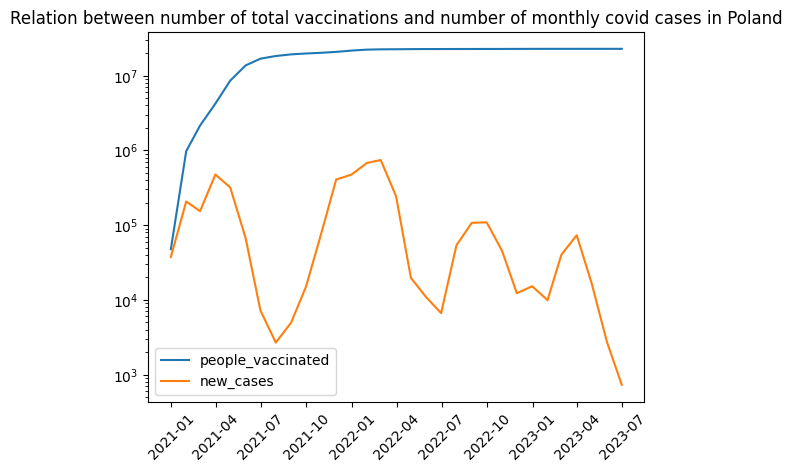

In [7]:
# Display the relation between number of total vaccinations and number of covid cases in Poland
data_poland = data[data["location"] == "Poland"]
data_poland = data_poland[["date", "people_vaccinated", "new_cases"]]

print(data_poland.info())

# Drop all rows where there is no data about number of vaccinations
data_poland = data_poland.dropna(subset=["people_vaccinated"])

print(data_poland.head())

# Group data by month
data_poland["date"] = pd.to_datetime(data_poland["date"])
# Sum only the "new_cases" column, for the "people_vaccinated" take the last value for each month
data_poland = data_poland.groupby(pd.Grouper(key="date", freq="M")).agg({"new_cases": "sum", "people_vaccinated": "last"}).reset_index()

print(data_poland.head())

plt.plot(data_poland["date"], data_poland["people_vaccinated"], label="people_vaccinated")
plt.plot(data_poland["date"], data_poland["new_cases"], label="new_cases")
plt.legend()
plt.title("Relation between number of total vaccinations and number of monthly covid cases in Poland")
# Logarithmic scale
plt.yscale("log")
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [8]:
# Calculate the correlation between number of total vaccinations and number of covid cases in Poland
corr = np.corrcoef(data_poland["people_vaccinated"], data_poland["new_cases"])
print("Correlation matrix for people_vaccinated and new_cases:\n", corr)

Correlation matrix for people_vaccinated and new_cases:
 [[ 1.         -0.13536198]
 [-0.13536198  1.        ]]


<class 'pandas.core.frame.DataFrame'>
Index: 1269 entries, 226738 to 228006
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1269 non-null   object 
 1   people_vaccinated  807 non-null    float64
 2   new_deaths         1269 non-null   float64
dtypes: float64(2), object(1)
memory usage: 39.7+ KB
None
              date  people_vaccinated  new_deaths
227098  2020-12-28             2000.0        27.0
227099  2020-12-29             6300.0       311.0
227100  2020-12-30            36300.0       565.0
227101  2020-12-31            47600.0       532.0
227103  2021-01-02            50391.0       102.0
        date  new_deaths  people_vaccinated
0 2020-12-31      1435.0            47600.0
1 2021-01-31      8216.0           976367.0
2 2021-02-28      5340.0          2149607.0
3 2021-03-31      7201.0          4231313.0
4 2021-04-30      9864.0          8597875.0


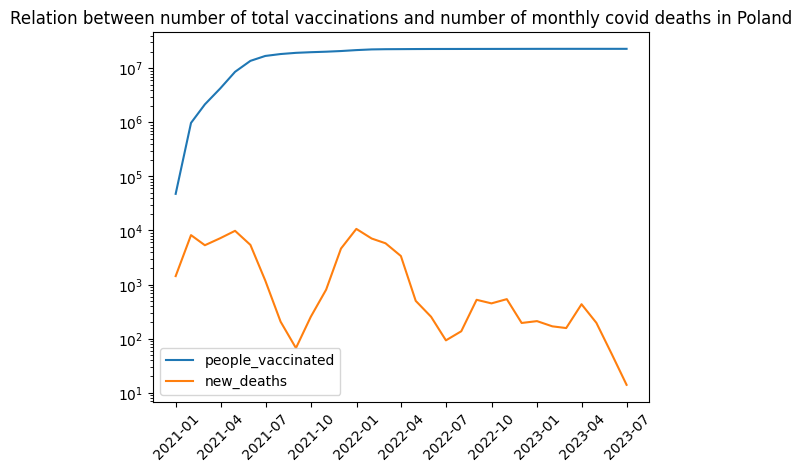

In [9]:
# Display the relation between number of total vaccinations and number of covid deaths in Poland
data_poland = data[data["location"] == "Poland"]
data_poland = data_poland[["date", "people_vaccinated", "new_deaths"]]
print(data_poland.info())

# Drop all rows where there is no data about number of vaccinations
data_poland = data_poland.dropna(subset=["people_vaccinated"])
print(data_poland.head())

# Group data by month
data_poland["date"] = pd.to_datetime(data_poland["date"])
data_poland = data_poland.groupby(pd.Grouper(key="date", freq="M")).agg({"new_deaths": "sum", "people_vaccinated": "last"}).reset_index()

print(data_poland.head())

plt.plot(data_poland["date"], data_poland["people_vaccinated"], label="people_vaccinated")
plt.plot(data_poland["date"], data_poland["new_deaths"], label="new_deaths")
plt.legend()
plt.title("Relation between number of total vaccinations and number of monthly covid deaths in Poland")
# Logarithmic scale
plt.yscale("log")
# Tilt the x-axis labels
plt.xticks(rotation=45)
plt.show()

In [10]:
# Calculate the correlation between number of total vaccinations and number of covid deaths in Poland
corr = np.corrcoef(data_poland["people_vaccinated"], data_poland["new_deaths"])
print("Correlation matrix for people_vaccinated and new_deaths:\n", corr)

Correlation matrix for people_vaccinated and new_deaths:
 [[ 1.        -0.5063519]
 [-0.5063519  1.       ]]
